In [1]:
pip install gymnax

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install distrax

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install chex

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install flax

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install optax

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install jax

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gymnax

In [3]:
gymnax.registered_envs

['CartPole-v1',
 'Pendulum-v1',
 'Acrobot-v1',
 'MountainCar-v0',
 'MountainCarContinuous-v0',
 'Asterix-MinAtar',
 'Breakout-MinAtar',
 'Freeway-MinAtar',
 'SpaceInvaders-MinAtar',
 'Catch-bsuite',
 'DeepSea-bsuite',
 'MemoryChain-bsuite',
 'UmbrellaChain-bsuite',
 'DiscountingChain-bsuite',
 'MNISTBandit-bsuite',
 'SimpleBandit-bsuite',
 'FourRooms-misc',
 'MetaMaze-misc',
 'PointRobot-misc',
 'BernoulliBandit-misc',
 'GaussianBandit-misc',
 'Reacher-misc',
 'Swimmer-misc',
 'Pong-misc']

In [43]:
import jax

rng = jax.random.PRNGKey(0)
rng, key_reset, key_policy, key_step = jax.random.split(rng, 4)

# create the CartPole-v1 environment
env, env_params = gymnax.make('MountainCar-v0')
# inspect default environment settings
print("Environment parameters:", env_params)

Environment parameters: EnvParams(max_steps_in_episode=200, min_position=-1.2, max_position=0.6, max_speed=0.07, goal_position=0.5, goal_velocity=0.0, force=0.001, gravity=0.0025)


In [23]:
# Verify observation and action space
print("Action Space Size:", env.num_actions)

Action Space Size: 3


In [24]:
# observation space dimensionality
env.observation_space(env_params).shape

(2,)

In [25]:
# action space dimensionality
env.action_space(env_params).n

3

In [26]:
obs, state = env.reset(key_reset, env_params)
obs, state

(Array([-0.58275205,  0.        ], dtype=float32),
 EnvState(time=Array(0, dtype=int32, weak_type=True), position=Array(-0.58275205, dtype=float32), velocity=Array(0., dtype=float32, weak_type=True)))

In [27]:
action = env.action_space(env_params).sample(key_policy)
n_obs, n_state, reward, done, _ = env.step(key_step, state, action, env_params)
n_obs, n_state, reward, done

/opt/anaconda3/envs/TPML/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


(Array([-5.8331072e-01, -5.5867527e-04], dtype=float32),
 EnvState(time=Array(1, dtype=int32, weak_type=True), position=Array(-0.5833107, dtype=float32), velocity=Array(-0.00055868, dtype=float32)),
 Array(-1., dtype=float32, weak_type=True),
 Array(False, dtype=bool))

You can also simply use the environment with its default settings:

In [28]:
obs, state = env.reset(key_reset)
action = env.action_space().sample(key_policy)
n_obs, n_state, reward, done, _ = env.step(key_step, state, action)

/opt/anaconda3/envs/TPML/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


In [29]:
vmap_reset = jax.vmap(env.reset, in_axes=(0, None))
vmap_step = jax.vmap(env.step, in_axes=(0, 0, 0, None))

num_envs = 8
vmap_keys = jax.random.split(rng, num_envs)

obs, state = vmap_reset(vmap_keys, env_params)
n_obs, n_state, reward, done, _ = vmap_step(vmap_keys, state, jax.numpy.zeros(num_envs), env_params)
print(n_obs.shape)

(8, 2)


In [30]:
import time
from RLinJAX import *

In [31]:
jax.devices()

[CpuDevice(id=0)]

In [32]:
algo.config

{'env': <gymnax.environments.classic_control.mountain_car.MountainCar at 0x343ed3f90>,
 'env_params': {'max_steps_in_episode': 200,
  'min_position': -1.2,
  'max_position': 0.6,
  'max_speed': 0.07,
  'goal_position': 0.5,
  'goal_velocity': 0.0,
  'force': 0.001,
  'gravity': 0.0025},
 'eval_callback': <function RLinJAX.algos.algorithm.Algorithm.create.<locals>.eval_callback(algo, ts, rng)>,
 'eval_freq': 4096,
 'skip_initial_evaluation': False,
 'total_timesteps': 131072,
 'learning_rate': 0.0003,
 'gamma': 0.95,
 'max_grad_norm': inf,
 'normalize_observations': False,
 'target_update_freq': 1,
 'polyak': 0.99,
 'num_envs': 1,
 'buffer_size': 131072,
 'fill_buffer': 2048,
 'batch_size': 256,
 'eps_start': 1.0,
 'eps_end': 0.05,
 'exploration_fraction': 0.1,
 'agent': {'hidden_layer_sizes': (64, 64),
  'activation': <PjitFunction>,
  'action_dim': 3,
  'parent': None,
  'name': None},
 'num_epochs': 1,
 'ddqn': True}

In [69]:
# CONFIGS = { "dqn": {
#             "agent": "DuelingQNetwork",
#             "agent_kwargs": {"activation": "swish"},
#         "buffer_size": 100000,
#         "fill_buffer": 1000,
#         "batch_size": 100,
#         "learning_rate": 3e-4,
#         "polyak": 0.98, 
#         "target_update_freq": 200,
#         "total_timesteps": 120000,
#         "eval_freq": 5000,
#         "eps_start": 1.0,
#         "eps_end": 0.01,
#         "exploration_fraction": 0.5,
#         "gamma": 0.9,
#         'num_epochs': 1,
#         'ddqn': True}
#          }
        

CONFIGS = {
    'eval_freq': 5000,
    'skip_initial_evaluation': False,
    'total_timesteps': 120000,
    'learning_rate': 0.0003,
    'gamma': 0.9,
    'max_grad_norm': 10.0,  # Avoid inf if unsupported
    'normalize_observations': False,
    'target_update_freq': 200,
    'polyak': 0.98,  # Avoid setting to None
    'num_envs': 1,
    'buffer_size': 100000,
    'fill_buffer': 1000,
    'batch_size': 100,
    'eps_start': 1.0,
    'eps_end': 0.01,
    'exploration_fraction': 0.5,
    'num_epochs': 10,  # Add a valid value or handle None
    'ddqn': True,
    'agent': {'hidden_layer_sizes': (64, 64),
    'activation': 'swish',
    'action_dim': 3,
    'parent': None,
    'name': None},
    }




In [70]:
algo_str = "dqn"
env_str = "MountainCar-v0"

algo_cls = get_algo(algo_str)
algo = algo_cls.create(env=env_str, **CONFIGS.get(algo_str, {}))

In [64]:
algo.config

{'env': <gymnax.environments.classic_control.mountain_car.MountainCar at 0x34742f2d0>,
 'env_params': {'max_steps_in_episode': 200,
  'min_position': -1.2,
  'max_position': 0.6,
  'max_speed': 0.07,
  'goal_position': 0.5,
  'goal_velocity': 0.0,
  'force': 0.001,
  'gravity': 0.0025},
 'eval_callback': <function RLinJAX.algos.algorithm.Algorithm.create.<locals>.eval_callback(algo, ts, rng)>,
 'eval_freq': 4096,
 'skip_initial_evaluation': False,
 'total_timesteps': 131072,
 'learning_rate': 0.0003,
 'gamma': 0.99,
 'max_grad_norm': inf,
 'normalize_observations': False,
 'target_update_freq': 1,
 'polyak': 0.99,
 'num_envs': 1,
 'buffer_size': 131072,
 'fill_buffer': 2048,
 'batch_size': 256,
 'eps_start': 1.0,
 'eps_end': 0.05,
 'exploration_fraction': 0.1,
 'agent': {'hidden_layer_sizes': (64, 64),
  'activation': <PjitFunction>,
  'action_dim': 3,
  'parent': None,
  'name': None},
 'num_epochs': 1,
 'ddqn': True}

In [65]:
algo = algo.replace(gamma=0.95)
print(f"New gamma: {algo.gamma}")

New gamma: 0.95


### Training the agent

In [71]:
# set training seed and jit train function
rng = jax.random.PRNGKey(0)
train_fn = jax.jit(algo.train)

print("Starting to train")
# Train
start = time.time()
train_state, evaluation = train_fn(rng)
time_elapsed = time.time() - start

sps = algo.total_timesteps / time_elapsed
print(f"Finished training in {time_elapsed:g} seconds ({sps:g} steps/second).")

Starting to train


/opt/anaconda3/envs/TPML/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/opt/anaconda3/envs/TPML/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


Finished training in 7.36889 seconds (17787.2 steps/second).


In [72]:
evaluation

(Array([[200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        [200, 200, 200, ..., 200, 200, 200],
        ...,
        [141,  95, 200, ..., 169, 161,  98],
        [143, 142, 145, ...,  90,  85, 156],
        [158, 156, 146, ..., 153,  99, 153]], dtype=int32, weak_type=True),
 Array([[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-141.,  -95., -200., ..., -169., -161.,  -98.],
        [-143., -142., -145., ...,  -90.,  -85., -156.],
        [-158., -156., -146., ..., -153.,  -99., -153.]],      dtype=float32, weak_type=True))

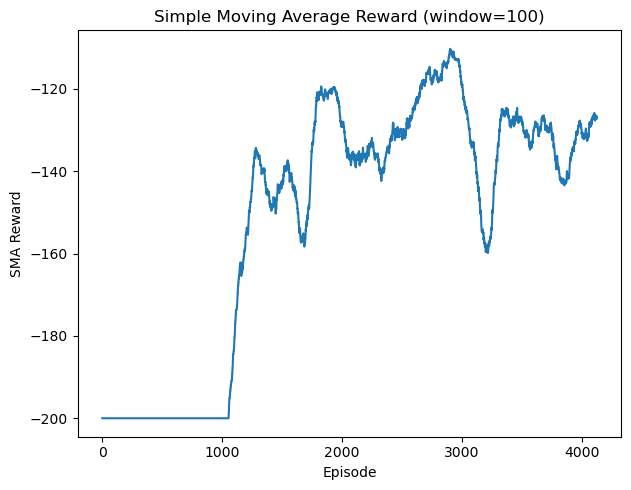

In [73]:
# from matplotlib import pyplot as plt
import numpy as np

episode_lengths, episode_returns = evaluation
episode_returns_2 = np.concatenate(episode_returns)

# mean_return = episode_returns.mean(axis=1)

# plt.plot(jax.numpy.linspace(0, algo.total_timesteps, len(mean_return)), mean_return)
# plt.xlabel("Environment step")
# plt.ylabel("Episodic return")
# plt.title(f"Training agent for {env_str} using {algo_str}")
# plt.show()



def simple_moving_average(data, window):
    return np.convolve(data, np.ones(window), 'valid') / window

window_size = 100
sma_rewards = simple_moving_average(episode_returns_2, window_size)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sma_rewards)
plt.title('Simple Moving Average Reward (window=100)')
plt.xlabel('Episode')
plt.ylabel('SMA Reward')



plt.tight_layout()
plt.show()

In [72]:
import jax
import time
import gymnax
import imageio
from RLinJAX import *

rng = jax.random.PRNGKey(0)
rng, key_reset, key_policy, key_step = jax.random.split(rng, 4)

# create the CartPole-v1 environment
env, env_params = gymnax.make('MountainCar-v0')
print("Environment parameters:", env_params)

CONFIGS = {
    'env': None,
    'env_params': {},
    'eval_callback': None,
    'eval_freq': 5000,
    'skip_initial_evaluation': False,
    'total_timesteps': 120000,
    'learning_rate': 0.0003,
    'gamma': 0.95,
    'max_grad_norm': 10.0,
    'normalize_observations': False,
    'target_update_freq': 200,
    'polyak': 0.98,
    'num_envs': 1,
    'buffer_size': 100000,
    'fill_buffer': 1000,
    'batch_size': 100,
    'eps_start': 1.0,
    'eps_end': 0.01,
    'exploration_fraction': 0.5,
    'num_epochs': 10,
    'ddqn': True,
    'agent': 'DuelingQNetwork',
    'agent_kwargs': {
        'activation': 'swish'
    }
}

algo_str = "dqn"
env_str = "MountainCar-v0"

algo_cls = get_algo(algo_str)
algo = algo_cls.create(env=env_str, **CONFIGS.get(algo_str, {}))

algo = algo.replace(gamma=0.95)
print(f"New gamma: {algo.gamma}")

# set training seed and jit train function
rng = jax.random.PRNGKey(0)
train_fn = jax.jit(algo.train)

print("Starting to train")
# Train
start = time.time()
train_state, evaluation = train_fn(rng)
time_elapsed = time.time() - start

sps = algo.total_timesteps / time_elapsed
print(f"Finished training in {time_elapsed:g} seconds ({sps:g} steps/second).")

def generate_gif(agent, env, env_params, filename="dqn_agent.gif", duration=0.1):
    frames = []
    rng = jax.random.PRNGKey(0)
    obs, state = env.reset(rng, env_params)
    done = False
    while not done:
        action = agent.get_action(obs, rng)  # Use the correct method to select action
        obs, state, reward, done, _ = env.step(rng, state, action, env_params)
        frame = env.render(mode='rgb_array')
        frames.append(frame)
    imageio.mimsave(filename, frames, duration=duration)

# Generate GIF for the trained DQN agent
generate_gif(algo, env, env_params, filename="dqn_agent.gif")

Environment parameters: EnvParams(max_steps_in_episode=200, min_position=-1.2, max_position=0.6, max_speed=0.07, goal_position=0.5, goal_velocity=0.0, force=0.001, gravity=0.0025)
New gamma: 0.95
Starting to train


/opt/anaconda3/envs/TPML/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/opt/anaconda3/envs/TPML/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


Finished training in 6.76978 seconds (19361.3 steps/second).


AttributeError: 'DQN' object has no attribute 'get_action'